In [35]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars = star_wars.dropna(axis=0, how='any', subset=["RespondentID"])

In [36]:
yes_no = {
    "Yes": True,
    "No": False
}

star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)

In [37]:
print(star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts())

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64


In [38]:
import numpy as np
movie_map = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.nan: False
}

for column in star_wars.columns[3:9]:
    star_wars[column] = star_wars[column].map(movie_map)
    
star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4": "seen_2",
    "Unnamed: 5": "seen_3",
    "Unnamed: 6": "seen_4",
    "Unnamed: 7": "seen_5",
    "Unnamed: 8": "seen_6"
})

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
1  3.292880e+09                                               True             
2  3.292880e+09                                              False             
3  3.292765e+09                                               True             
4  3.292763e+09                                               True             
5  3.292731e+09                                               True             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                                               True                      
2                                                NaN                      
3                                              False                      
4                                               True                      
5                                               True                      

  Which of the following Star Wars films have you seen? Please selec

In [40]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
star_wars = star_wars.rename(columns={
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
    "Unnamed: 10": "ranking_2",
    "Unnamed: 11": "ranking_3",
    "Unnamed: 12": "ranking_4",
    "Unnamed: 13": "ranking_5",
    "Unnamed: 14": "ranking_6"
})
print(star_wars.iloc[0])

RespondentID                                                                                                                           3.29288e+09
Have you seen any of the 6 films in the Star Wars franchise?                                                                                  True
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                         True
seen_1                                                                                                                                        True
seen_2                                                                                                                                        True
seen_3                                                                                                                                        True
seen_4                                                                                                                

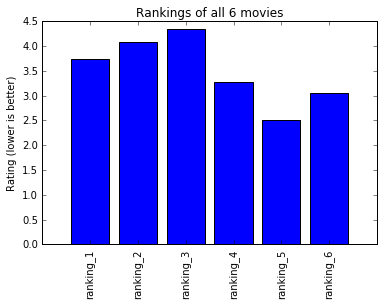

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
means = star_wars.mean()
plt.bar(np.arange(6), means[8:], align="center")
plt.xticks(np.arange(6), star_wars.columns[9:15], rotation=90)
plt.ylabel('Rating (lower is better)')
plt.title('Rankings of all 6 movies')
plt.show()

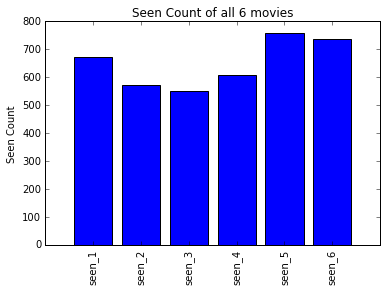

In [48]:
sums = star_wars.sum()
plt.bar(np.arange(6), sums[2:8], align="center")
plt.xticks(np.arange(6), star_wars.columns[3:9], rotation=90)
plt.ylabel('Seen Count')
plt.title('Seen Count of all 6 movies')
plt.show()

In [ ]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]
male_means = males.mean()
female_means = females.mean()
plt.bar(np.arange(6), male_means[8:], align="center")
plt.xticks(np.arange(6), star_wars.columns[9:15], rotation=90)
plt.ylabel('Rating (lower is better)')
plt.title('Rankings of all 6 movies')
plt.show()